Titanic dataset process

In [ ]:

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow import feature_column
import matplotlib.pyplot as plt

In [ ]:
# Download the Titanic dataset using tfds
# (raw_train, raw_val, raw_test), metadata = tfds.load("titanic",
#     split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
#     with_info=True,
#     as_supervised=True,)
# print(raw_train)

#https://github.com/BeanOfChaos/WorkshopNN/
ds = tfds.load("titanic",
                shuffle_files=True,
                as_supervised=True,
                )["train"]



# lists are easier to manipulate, and no significative performance overhead
# format: list of tuples as (dict of features, target)
ds = list(ds.as_numpy_iterator())

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1309 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/titanic/4.0.0.incompleteU36LGX/titanic-train.tfrecord*...:   0%|          …

Dataset titanic downloaded and prepared to /root/tensorflow_datasets/titanic/4.0.0. Subsequent calls will reuse this data.


In [ ]:
allf = {key: set() for key in ds[0][0].keys()}
for elem in ds:
    for key in elem[0].keys():
        allf[key].add(elem[0][key])


for key in allf.keys():
    #features[key] = allf[key]
    print(key, " : ", allf[key])

age  :  {0.75, 1.0, 2.0, 3.0, 0.6667, 5.0, 6.0, 0.8333, 7.0, 9.0, 10.0, 11.0, 4.0, 0.3333, 14.0, 15.0, 16.0, 17.0, 18.0, 18.5, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.5, 28.0, 26.5, 30.0, 31.0, 32.0, 33.0, 29.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 38.5, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 54.0, 55.0, 56.0, 57.0, 58.0, 53.0, 60.0, 61.0, 62.0, 63.0, 60.5, 65.0, 64.0, 59.0, 66.0, 12.0, 70.0, 71.0, 70.5, 14.5, 74.0, 67.0, 76.0, 80.0, 19.0, 20.5, 22.5, 23.5, 24.5, 30.5, 0.4167, 0.9167, 0.1667, 32.5, 34.0, 34.5, 36.5, 40.5, 8.0, 43.0, 45.5, 55.5, 11.5, 13.0, -1.0}
boat  :  {b'3', b'B', b'4', b'C D', b'5 9', b'13 15 B', b'8 10', b'A', b'12', b'11', b'D', b'13', b'6', b'C', b'5 7', b'5', b'15', b'9', b'Unknown', b'7', b'8', b'2', b'1', b'15 16', b'14', b'10', b'13 15', b'16'}
body  :  {1, 4, 7, 9, 14, 15, 16, 17, 18, 19, 22, 32, 35, 37, 38, 43, 45, 46, 47, 50, 51, 52, 53, 58, 61, 62, 67, 68, 69, 70, 72, 75, 79, 80, 81, 89, 96, 97, 98, 101, 103, 108, 109

In [ ]:
print(ds[0])

({'age': 30.0, 'boat': b'Unknown', 'body': -1, 'cabin': b'Unknown', 'embarked': 2, 'fare': 13.0, 'home.dest': b'Sarnia, ON', 'name': b'McCrie, Mr. James Matthew', 'parch': 0, 'pclass': 1, 'sex': 0, 'sibsp': 0, 'ticket': b'233478'}, 0)


In [ ]:
def preprocessing(ds, one_hot_keys=[], ignored_keys=[]):
    res_x = np.empty((1, len(ds)), dtype=np.float32)
    tmp = np.empty_like(res_x)
    ds_keys = ds[0][0].keys()
    for key in ds_keys:
        if key in ignored_keys:
            continue
        elif key in one_hot_keys:
            allvals = set()
            for elem in ds:
                allvals.add(elem[0][key])
            allvals = sorted(list(allvals))
            tmp_oh = np.zeros((len(allvals), len(ds)), dtype=np.float32)
            for i, elem in enumerate(ds):
                tmp_oh[allvals.index(elem[0][key]), i] = 1.
            res_x = np.concatenate((res_x, tmp_oh), axis=0)
        else:
            for i, elem in enumerate(ds):
                tmp[0, i] = elem[0][key]
            res_x = np.concatenate((res_x, tmp), axis=0)
    res_y = np.empty((1, len(ds)), dtype=np.float32)
    for i, elem in enumerate(ds):
        res_y[0, i] = elem[1]
    return (np.transpose(np.delete(res_x, 0, axis=0)), np.transpose(res_y))

In [ ]:
#  dataset preprocessing

one_hot_keys = ["boat", "cabin"] # to be filled in
ignored_keys = ["name", "ticket", "home.dest"]

train_features, train_labels = preprocessing(ds, one_hot_keys=one_hot_keys, ignored_keys=ignored_keys)
print(train_features)
print(train_features.shape, train_labels.shape)
print(train_features.shape[1])

[[30.  0.  0. ...  1.  0.  0.]
 [37.  0.  0. ...  2.  0.  2.]
 [28.  0.  0. ...  1.  1.  0.]
 ...
 [-1.  0.  0. ...  2.  1.  0.]
 [31.  0.  0. ...  2.  1.  1.]
 [36.  0.  0. ...  1.  0.  1.]]
(1309, 223) (1309, 1)
223


In [ ]:

# build model
# model = tf.keras.Sequential([
#   layers.Dense(16, activation="relu", input_shape=(train_features.shape[1],)),
#   layers.Dense(8, activation="relu"),
#   layers.Dense(1, activation="sigmoid"),
# ])

model = tf.keras.Sequential([
  layers.Dense(1000, activation="tanh"),
  layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
BATCH_SIZE = 16
VAL_SPLIT = 0.1
epochs = 10

history = model.fit(train_features, train_labels, batch_size=BATCH_SIZE,
          epochs=epochs,
          validation_split=VAL_SPLIT)

Epoch 1/10
74/74 [==============================] - 1s 5ms/step - loss: 0.4681 - accuracy: 0.7784 - val_loss: 0.3117 - val_accuracy: 0.9160
Epoch 2/10
74/74 [==============================] - 0s 4ms/step - loss: 0.2430 - accuracy: 0.9312 - val_loss: 0.1651 - val_accuracy: 0.9618
Epoch 3/10
74/74 [==============================] - 0s 4ms/step - loss: 0.1565 - accuracy: 0.9550 - val_loss: 0.1198 - val_accuracy: 0.9618
Epoch 4/10
74/74 [==============================] - 0s 4ms/step - loss: 0.1199 - accuracy: 0.9669 - val_loss: 0.1305 - val_accuracy: 0.9466
Epoch 5/10
74/74 [==============================] - 0s 4ms/step - loss: 0.1074 - accuracy: 0.9669 - val_loss: 0.0913 - val_accuracy: 0.9695
Epoch 6/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0950 - accuracy: 0.9737 - val_loss: 0.0865 - val_accuracy: 0.9695
Epoch 7/10
74/74 [==============================] - 0s 4ms/step - loss: 0.0896 - accuracy: 0.9754 - val_loss: 0.0785 - val_accuracy: 0.9771
Epoch 8/10
74/74 [==

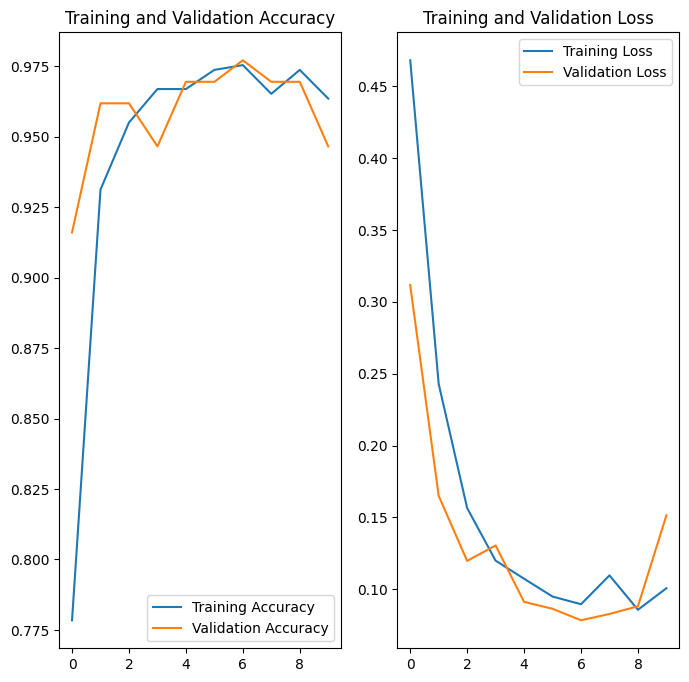

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### another

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
dfrawtrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dftest = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data

dftrain, dfval = train_test_split(dfrawtrain, test_size=0.2)

y_train = dftrain.pop('survived')
y_val = dfval.pop('survived')
y_test = dftest.pop('survived')

In [ ]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
384,female,7.0,0,2,26.2500,Second,unknown,Southampton,n
449,male,80.0,0,0,30.0000,First,A,Southampton,y
117,female,16.0,0,0,7.7333,Third,unknown,Queenstown,y
88,male,22.0,0,0,8.0500,Third,unknown,Southampton,y
110,male,18.0,0,0,11.5000,Second,unknown,Southampton,y


In [ ]:
dftest.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [ ]:
def df_to_dataset(data_df, label_df, shuffle=True, batch_size=32):
   ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
   if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
   ds = ds.batch(batch_size) # split dataset into batches of 32
   return ds  # return a batch of the dataset

train_batches = df_to_dataset(dftrain, y_train)
val_batches = df_to_dataset(dfval, y_val)
test_batches = df_to_dataset(dftest, y_test)
print(type(y_train))

<class 'pandas.core.series.Series'>


In [ ]:
print(train_batches.take(1))

<_TakeDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'n_siblings_spouses': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'parch': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fare': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'class': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'deck': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'embark_town': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'alone': TensorSpec(shape=(None,), dtype=tf.string, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dfrawtrain[feature_name].unique()  # gets a list of all unique values from given feature column
  categorical_column = tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)
  indicator_column = feature_column.indicator_column(categorical_column)
  feature_columns.append(indicator_column)

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0)), IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town', voca

In [ ]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [ ]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(1000, activation="tanh"),
  layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])



In [ ]:
epochs = 20
history = model.fit(train_batches,
                    validation_data=val_batches,
                    epochs=epochs)

Epoch 1/20
160/160 [==============================] - 3s 17ms/step - loss: 0.2819 - accuracy: 0.8962 - val_loss: 0.4930 - val_accuracy: 0.7857
Epoch 2/20
160/160 [==============================] - 3s 16ms/step - loss: 0.2710 - accuracy: 0.9010 - val_loss: 0.5338 - val_accuracy: 0.7778
Epoch 3/20
160/160 [==============================] - 1s 8ms/step - loss: 0.2756 - accuracy: 0.8934 - val_loss: 0.5007 - val_accuracy: 0.7778
Epoch 4/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2734 - accuracy: 0.8968 - val_loss: 0.5007 - val_accuracy: 0.8095
Epoch 5/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2591 - accuracy: 0.9030 - val_loss: 0.5184 - val_accuracy: 0.7857
Epoch 6/20
160/160 [==============================] - 1s 7ms/step - loss: 0.2717 - accuracy: 0.8966 - val_loss: 0.5405 - val_accuracy: 0.7778
Epoch 7/20
160/160 [==============================] - 1s 6ms/step - loss: 0.2577 - accuracy: 0.9052 - val_loss: 0.5366 - val_accuracy: 0.7778
Epoc

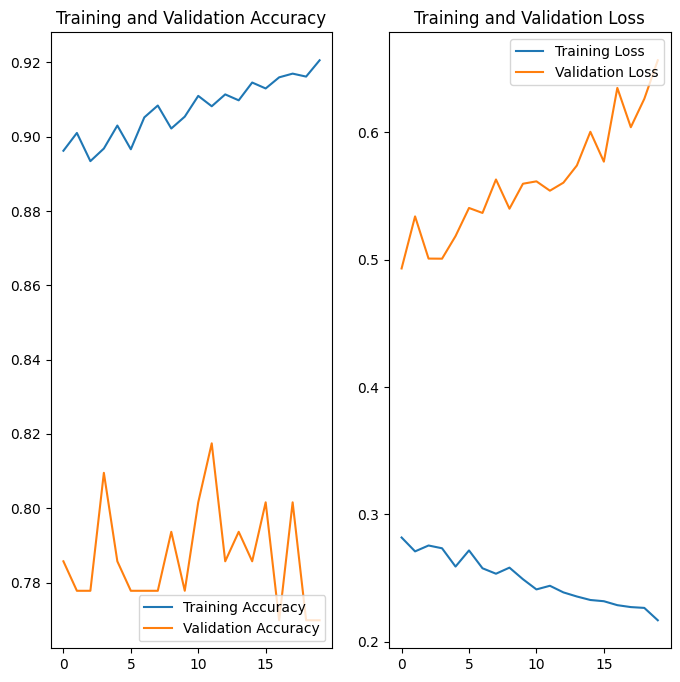

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_batches)
print("Accuracy", accuracy)

90/90 [==============================] - 0s 5ms/step - loss: 0.6355 - accuracy: 0.8258
Accuracy 0.8257575631141663


### Another one

In [ ]:
# (raw_train, raw_validation, raw_test), metadata = tfds.load(
#     'titanic',
#     split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
#     with_info=True,
#     as_supervised=True,
# )

# allf = {key: set() for key in raw_train[0][0].keys()}
# for elem in raw_train:
#     for key in elem[0].keys():
#         allf[key].add(elem[0][key])


# for key in allf.keys():
#     #features[key] = allf[key]
#     print(key, " : ", allf[key])


# BATCH_SIZE = 32
# SHUFFLE_BUFFER_SIZE = 1000

# print(raw_train.take(1))

# train_batches = raw_train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# validation_batches = raw_validation.batch(BATCH_SIZE)
# test_batches = raw_test.batch(BATCH_SIZE)


# CATEGORICAL_COLUMNS = ['boat', 'cabin']
# NUMERIC_COLUMNS = ['age', 'body', 'embarked', 'fare', 'parch', 'pclass', 'sex', 'sibsp']

# feature_columns = []
# for feature_name in CATEGORICAL_COLUMNS:
#   vocabulary = allf[feature_name].unique()  # gets a list of all unique values from given feature column
#   categorical_column = tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)
#   indicator_column = feature_column.indicator_column(categorical_column)
#   feature_columns.append(indicator_column)

# for feature_name in NUMERIC_COLUMNS:
#   feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

# feature_layer = tf.keras.layers.DenseFeatures(feature_columns)


# model = tf.keras.Sequential([
#   feature_layer,
#   layers.Dense(1000, activation="tanh"),
#   layers.Dense(1, activation="sigmoid"),
# ])

# # Compile the model
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])



In [ ]:
# epochs = 20
# history = model.fit(train_batches,
#                     validation_data=val_batches,
#                     epochs=epochs)